# № 1 

In [77]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

print (data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [78]:
import pandas as pd

X = data.data
y = data.target

print (X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [79]:
import numpy as np

def custom_pca(_data, N):
    norm_data = _data - _data.mean(axis=0)

    cov_matrix = np.cov(norm_data, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    selected_components = sorted_eigenvectors[:, :N]

    reduced_data = np.dot(norm_data, selected_components)
    return reduced_data

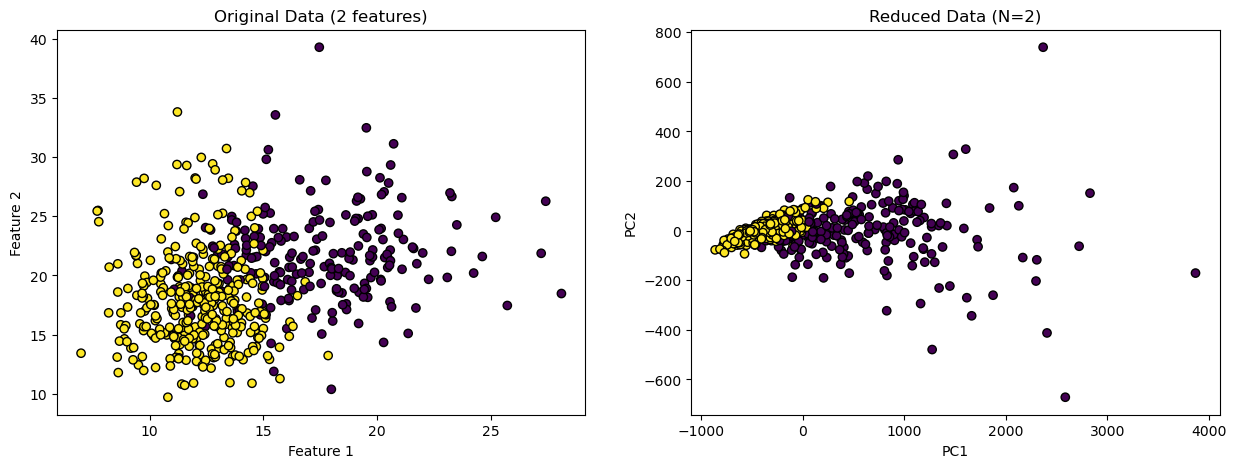

In [92]:
import matplotlib.pyplot as plt

N_comp = 2
X= data.data

reduced_data = custom_pca(X, N=N_comp)


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=data.target, cmap='viridis', edgecolors='k')
plt.title('Original Data (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data.target, cmap='viridis', edgecolors='k')
plt.title(f'Reduced Data (N={N_comp})')

plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

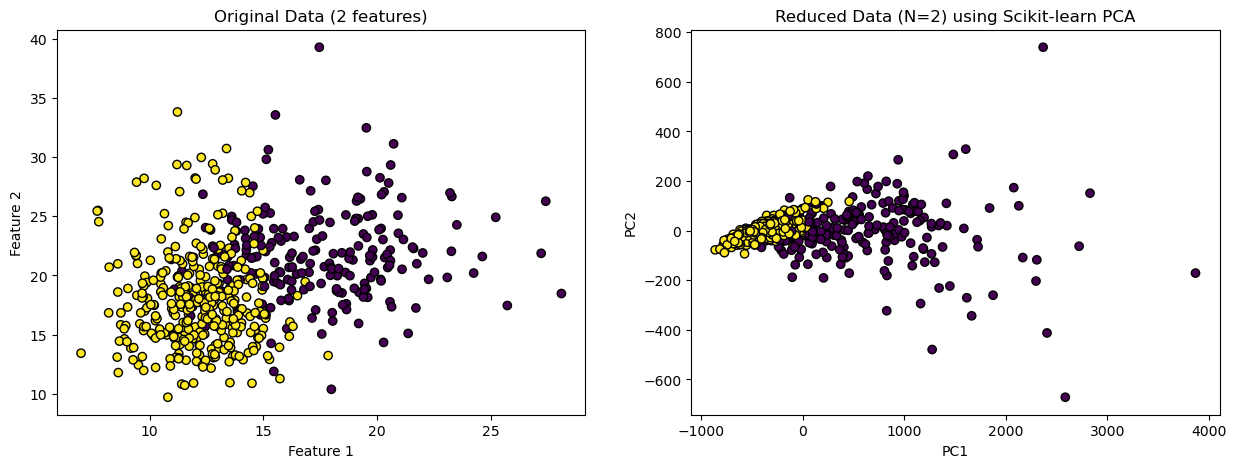

In [95]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


X = data.data

N_components = 2
pca = PCA(n_components=N_components)
reduced_data = pca.fit_transform(X)

plt.figure(figsize=(15, 5))


plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=data.target, cmap='viridis', edgecolors='k')
plt.title('Original Data (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1,2,2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data.target, cmap='viridis', edgecolors='k')
plt.title(f'Reduced Data (N={N_comp}) using Scikit-learn PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

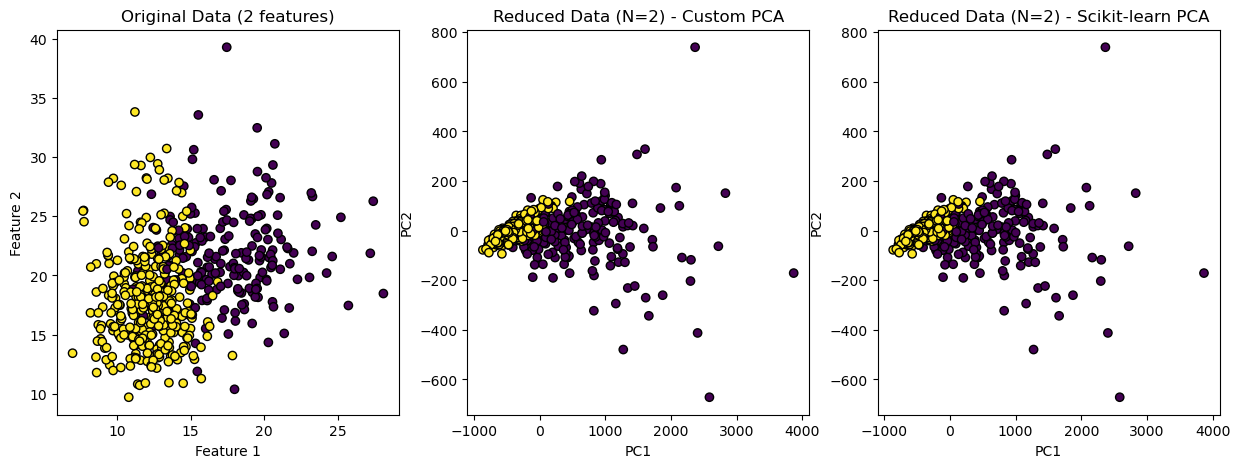

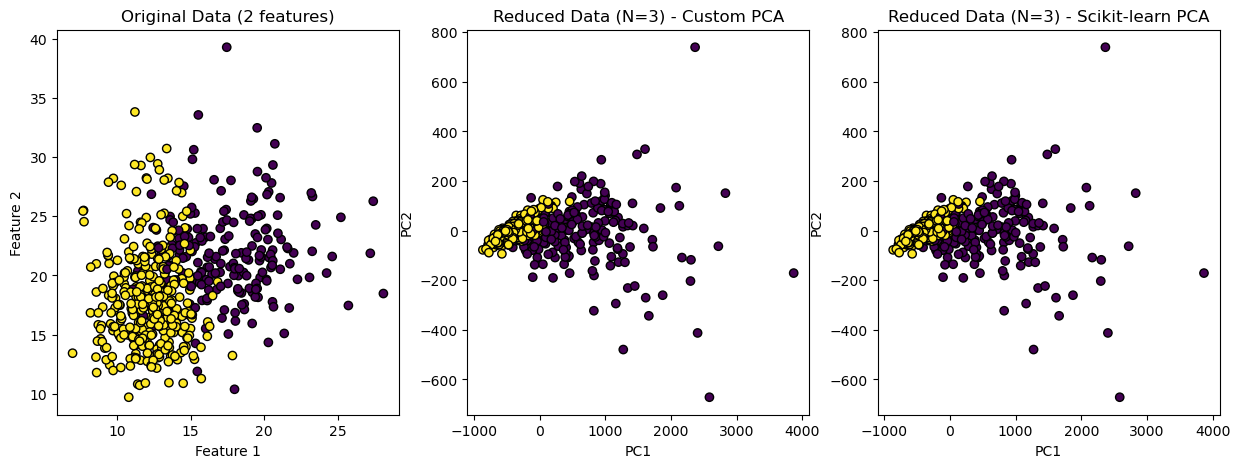

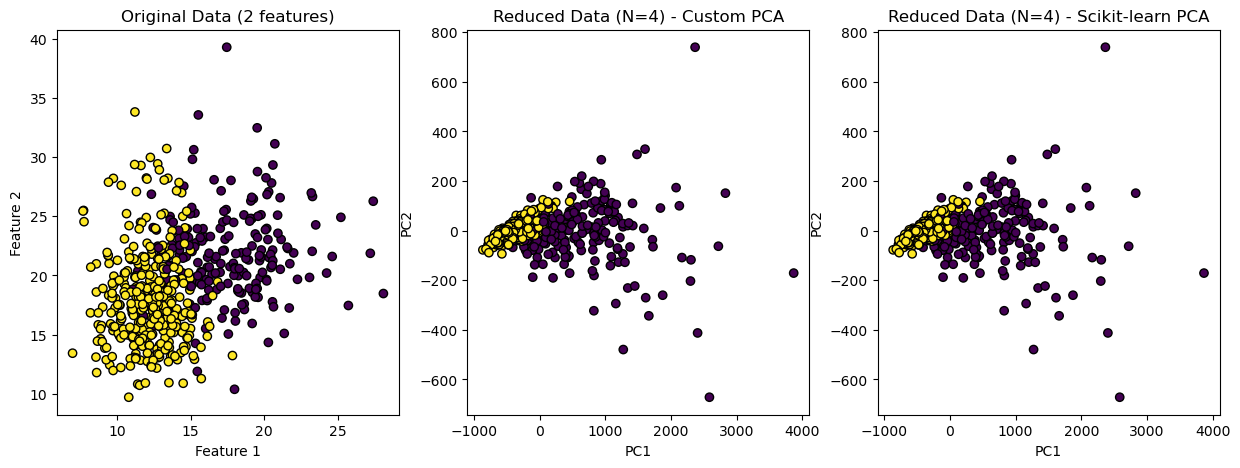

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

X = data.data

N_components_list = [2, 3, 4]

for N_comp in N_components_list:

    reduced_data_custom = custom_pca(X, N_comp)

    reduced_data_sklearn = PCA(n_components=N_comp).fit_transform(X)

    plt.figure(figsize=(15, 5))

    plt.subplot(1,3,1)
    plt.scatter(X[:, 0], X[:, 1], c=data.target, cmap='viridis', edgecolors='k')
    plt.title('Original Data (2 features)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.subplot(1,3,2)
    plt.scatter(reduced_data_custom[:, 0], reduced_data_custom[:, 1], c=data.target, cmap='viridis', edgecolors='k')
    plt.title(f'Reduced Data (N={N_comp}) - Custom PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.subplot(1,3,3)
    plt.scatter(reduced_data_sklearn[:, 0], reduced_data_sklearn[:, 1], c=data.target, cmap='viridis', edgecolors='k')
    plt.title(f'Reduced Data (N={N_comp}) - Scikit-learn PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.show()